In [1]:
pip install pymatgen -q

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from fastai import *
from fastai.vision.all import *

#from torchvision import transforms
#from PIL import Image

import sys
sys.path.append('..')
from src.band_plotters import *
from src.Tiff32Image import TiffImage, load_tiff_uint16_image

sys.path.append('/notebooks/Beta-VAE/')
from model import BetaVAE_B, BetaVAE_B_128

latent_length=8

In [8]:
model = BetaVAE_B_128(z_dim=latent_length, nc=1)

checkpoint = torch.load("../../Beta-VAE/checkpoints/run_dpi_none_thickness_3_128x128_B_gamma100_z{0}_validated_random_0.0/last".format(latent_length))
model.load_state_dict(checkpoint['model_states']['net'])

model.eval()
print(model.z_dim)

8


In [34]:
view_prediction_npz?

Signature:
view_prediction_npz(
    material_id,
    model,
    npz_path,
    npz_filename,
    npz_key='images',
    bool_binarise=False,
    threshold=0.8,
)
Docstring: <no docstring>
File:      /notebooks/band-fingerprint/src/band_plotters.py
Type:      function


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.func

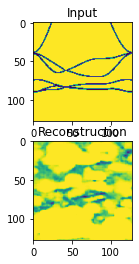

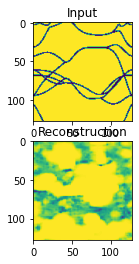

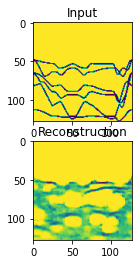

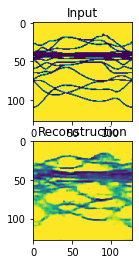

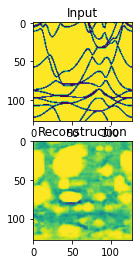

In [10]:
for i in range(5):
    view_prediction_npz("2dm-{0}".format(1+i*101), model, npz_path="../../Beta-VAE/data/dpi_none_thickness_3_128x128_binary", npz_filename="dpi_none_thickness_3_128x128_binary", bool_binarise=False, threshold=0.9)
    
#view_prediction_npz("2dm-1", model, npz_path="../../Beta-VAE/data/dpi_none_thickness_3_128x128_binary", npz_filename="dpi_none_thickness_3_128x128_binary", bool_binarise=False, threshold=0.9)

In [6]:
!ls band-fingerprint/fingerprints

ls: cannot access 'band-fingerprint/fingerprints': No such file or directory


In [ ]:
import visdom

vis = visdom.Visdom()

# Send input and reconstructed images to Visdom
vis.image(input_image_np.transpose((2, 0, 1)), win='Input Image', opts=dict(title='Input Image'))
vis.image(reconstructed_image_np.transpose((2, 0, 1)), win='Reconstructed Image', opts=dict(title='Reconstructed Image'))

In [11]:
mat_id = "2dm-15"

# Load and preprocess the input image
input_image_path = "../../../storage/2dmatpedia/images/no_dos_bw/low_dpi_bands/{0}.png".format(mat_id)
input_image = Image.open(input_image_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((128,128)),  # Adjust height and width as needed
    transforms.ToTensor(),
])
input_tensor = transform(input_image).unsqueeze(0)  # Add batch dimension

In [10]:
with torch.no_grad():
    reconstructed_image = model(input_tensor)

# Convert tensors to NumPy arrays for visualization
input_image_np = np.transpose(input_tensor.squeeze().numpy(), (1, 2, 0))
reconstructed_image_np = np.transpose(reconstructed_image.squeeze().numpy(), (1, 2, 0))

# Display the input and reconstructed images
plt.subplot(1, 2, 1)
plt.imshow(input_image_np)
plt.title('Input Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_np)
plt.title('Reconstructed Image')

plt.show()

NameError: name 'input_tensor' is not defined